<h3 style='color:blue' align='center'>Customer Churn Prediction Using Artificial Neural Network (ANN)</h3>

Customer churn prediction is to measure why customers are leaving a business. In this tutorial we will be looking at customer churn in telecom business. We will build a deep learning model to predict the churn and use precision,recall, f1-score to measure performance of our model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow import keras

**Load the data**

In [2]:
df = pd.read_csv("cc.csv")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


**Train test split**

In [3]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [4]:
X_train.shape

(5625, 26)

In [5]:
X_test.shape

(1407, 26)

In [6]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5655,1,1,0,0,10,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2616,0,0,1,0,71,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1323,0,0,1,0,59,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3601,1,0,0,0,13,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2768,0,0,1,0,24,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1931,1,0,1,0,51,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5378,0,0,0,0,4,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4324,0,0,0,0,71,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [7]:
len(X_train.columns)

26

**Build a model (ANN) in tensorflow/keras**

In [8]:
opt = keras.optimizers.Adam()


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=250)


Epoch 1/250


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5614 - loss: 5.4696
Epoch 2/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7316 - loss: 0.8436
Epoch 3/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7624 - loss: 0.9428
Epoch 4/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7720 - loss: 0.7039
Epoch 5/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7754 - loss: 0.6617
Epoch 6/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7727 - loss: 0.6120
Epoch 7/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7635 - loss: 0.9683
Epoch 8/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7520 - loss: 0.8035
Epoch 9/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7791 - loss: 0.6239
Epoch 10/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7713 - loss: 0.6324
Epoch 11/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7862 - loss: 0.5864
Epoch 12/250
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

In [9]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7950 - loss: 0.4461


[0.4642379581928253, 0.7853589057922363]

In [10]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.23531021],
       [0.4531861 ],
       [0.07977235],
       [0.81831974],
       [0.6126558 ]], dtype=float32)

In [11]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [12]:
y_test.shape

(1407,)

In [13]:
y_pred[:10]

[0, 0, 0, 1, 1, 1, 0, 1, 1, 0]

In [14]:
y_test[:10]

,Churn
2655,0
743,0
5570,1
64,1
3282,1
814,1
2665,0
5911,0
1020,0
6078,0


In [15]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85       999
           1       0.62      0.68      0.65       408

    accuracy                           0.79      1407
   macro avg       0.74      0.76      0.75      1407
weighted avg       0.79      0.79      0.79      1407



Text(95.72222222222221, 0.5, 'Truth')

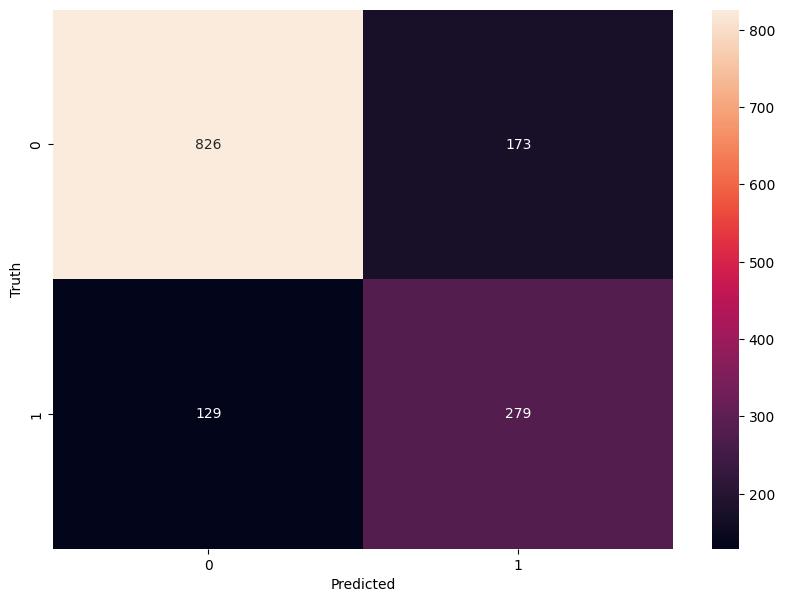

In [16]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Accuracy**

In [17]:
round((862+229)/(862+229+137+179),2)

0.78

**Precision for 0 class. i.e. Precision for customers who did not churn**

In [18]:
round(862/(862+179),2)

0.83

**Precision for 1 class. i.e. Precision for customers who actually churned**

In [19]:
round(229/(229+137),2)

0.63

**Recall for 0 class**

In [20]:
round(862/(862+137),2)

0.86

In [21]:
round(229/(229+179),2)

0.56

### **Save the Model**

In [22]:
# Save the model
model.save("customer_churn_model.h5")
print("Model saved as 'customer_churn_model.h5'")

Model saved as 'customer_churn_model.h5'
